In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib

%matplotlib inline

In [2]:
print('Python version {}'.format(sys.version))
print('Numpy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('Matplotlib version {}'.format(matplotlib.__version__))

Python version 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy version 1.14.5
Pandas version 0.23.3
Matplotlib version 2.2.2


# Create Data
The data set will consist of 1,000 baby names and the number of births recorded for that year (1880). We will also add plenty of duplicates so you will see the same baby name more than once. You can think of the multiple entries per name simply being different hospitals around the country reporting the number of births per baby name. So if two hospitals reported the baby name "Bob", the data will have two values for the name Bob. We will start by creating the random set of baby names.

In [3]:
names = ['Bob', 'Jessica', 'Mary', 'Jone', 'Mel']

In [4]:
np.random.seed(500)
random_names = [names[np.random.randint(low=0, high=len(names))] for i in range(1000)]

random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

In [5]:
births = [np.random.randint(low=0, high=1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

In [6]:
BabyDataSet = list(zip(random_names, births))
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

In [7]:
df = pd.DataFrame(data=BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


In [8]:
df.to_csv('births1880.txt', index=False, header=False)

# Get Data

In [12]:
Location = r'births1880.txt'
df = pd.read_csv(Location)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Mary    999 non-null object
968     999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [13]:
df.head()

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124


In [14]:
df = pd.read_csv(Location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [15]:
df.tail()

,0,1
995,Jone,151
996,Jessica,511
997,Jone,756
998,Jessica,294
999,Jone,152


In [16]:
df = pd.read_csv(Location, names=['Names', 'Births'])
df.head(5)

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


In [17]:
import os
os.remove(Location)

# Prepare Data

## Find all the unique records with method-1: unique()

In [18]:
df.Names.unique()

array(['Mary', 'Jessica', 'Bob', 'Jone', 'Mel'], dtype=object)

## Find all the unique records with method-2: describe()

In [21]:
df.Names.describe()

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object

## Aggregate data with method: groupby()

In [24]:
# create a groupby object
name = df.groupby('Names')

# Apply the sum method to the groupby object
df = name.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
Jone,90705
Mary,99438
Mel,102319


# Analyze Data

## Find the most popular name with method-1: sort_value()

In [25]:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Bob,106817


## Find the most popular name with method-2: max()

In [26]:
df.Births.max()

106817

# Present Data

The most popular name


,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
Jone,90705


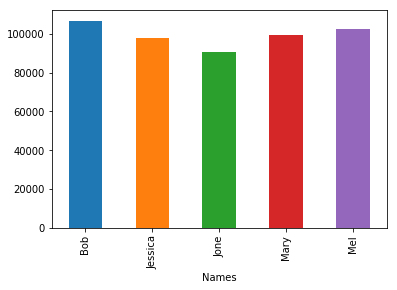

In [28]:
df.Births.plot.bar()

print('The most popular name')
df.sort_values(['Births'], ascending=False)